# Calculating sub-cell voltages as a function of bias

Here we implement a simple model for a double junction solar cell.  For simplicity we use an equivalent circiit model for each sub-cell, whereby we supply Jsc, diode saturation currents J01 and J02 as well as shunt and series resistances.  In this example, for simplicity, we set J02 to be negligably small, the shunt resistance to be large and series resistance to be small.

Solving IV of the junctions...
Solving IV of the tunnel junctions...
Solving IV of the total solar cell...


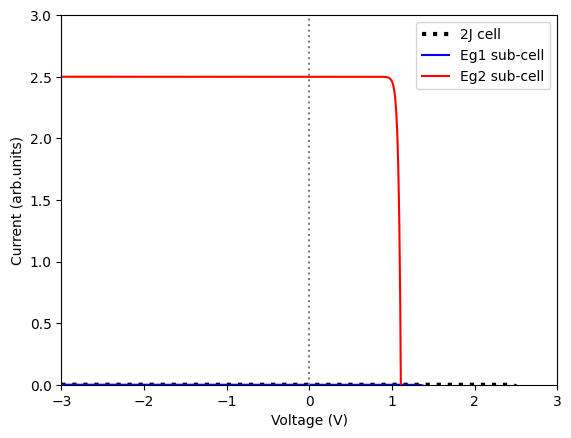

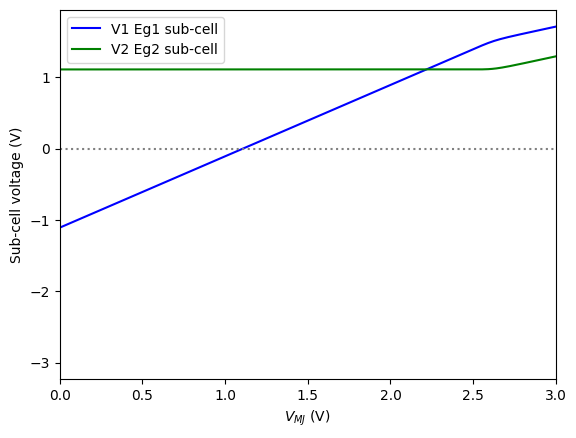

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from solcore.solar_cell import SolarCell
from solcore.light_source import LightSource
from solcore.solar_cell_solver import solar_cell_solver
from solcore.structure import Junction

# Configure the Eg1 junction.
eg1_junction = Junction(kind='2D', T=300, A=1, n1=1, n2=2, R_series=0.000, R_shunt=1e14, j01=6E-25, j02=1E-18, jsc=0)

# Configure the Eg2 junction.
eg2_junction = Junction(kind='2D', T=300, A=1, n1=1, n2=2, R_series=0.000, R_shunt=1e14, j01=6E-18, j02=1E-18, jsc=25)

# Assemble the solar cell from the Eg1 and Eg2 junctions.
my_solar_cell = SolarCell([eg1_junction, eg2_junction], T=300, R_series=0.0, area=1)

# Define the voltage range over which to perform the calculation
V = np.linspace(-3, 3, 500)

# Perform the calculation
solar_cell_solver(my_solar_cell, 'iv',
                  user_options={'T_ambient': 300,  'voltages': V, 'light_iv': True,
                                        'internal_voltages': np.linspace(-3, 3, 1100)})
#Plot the IV curves
plt.figure(1)
plt.plot(V, my_solar_cell.iv['IV'][1]/10, 'k', linewidth=3, label='2J cell',linestyle='dotted')
plt.plot(V, -my_solar_cell[0].iv(V)/10, 'b', label='Eg1 sub-cell')
plt.plot(V, -my_solar_cell[1].iv(V)/10, 'r', label='Eg2 sub-cell')
plt.axvline(x=0,color='gray',linestyle='dotted')
plt.legend()
plt.ylim(0, 3)
plt.xlim(-3, 3)
plt.ylabel('Current (arb.units)')
plt.xlabel('Voltage (V)')
plt.show()

#Plot the sub-cell voltages as a function of MJ cell voltage
plt.figure(2)
plt.plot(V, my_solar_cell.iv["junction IV"][0][0], 'b', label='V1 Eg1 sub-cell')
plt.plot(V, my_solar_cell.iv["junction IV"][1][0], 'g', label='V2 Eg2 sub-cell')
plt.legend()
plt.axhline(y=0,color='gray',linestyle='dotted')
plt.xlim(0, 3)
plt.xlabel('$V_{MJ}$ (V)')
plt.ylabel('Sub-cell voltage (V)')
plt.show()
